In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
data=pd.read_csv("tips.csv")

In [4]:
#extract the total bill column into anew series

total_bill_series=data["total_bill"]
total_bill_series.head()
mu,std=total_bill_series.mean(),total_bill_series.std()

In [5]:
#calculate z_score for each value
z_scores=(total_bill_series-mu)/std

(array([0.00171695, 0.0103017 , 0.02232036, 0.04979156, 0.05322546,
        0.06352717, 0.04807461, 0.03948986, 0.03090511, 0.02232036,
        0.0171695 , 0.01545255, 0.00858475, 0.01201865, 0.00515085,
        0.0068678 , 0.00171695, 0.0034339 , 0.00515085, 0.00171695]),
 array([ 3.07 ,  5.457,  7.844, 10.231, 12.618, 15.005, 17.392, 19.779,
        22.166, 24.553, 26.94 , 29.327, 31.714, 34.101, 36.488, 38.875,
        41.262, 43.649, 46.036, 48.423, 50.81 ]),
 <BarContainer object of 20 artists>)

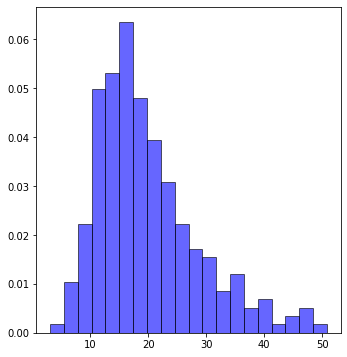

In [8]:
#plot normal distribution graph of total_bill
plt.figure(figsize=(12,6))
#histogram
plt.subplot(1,2,1)
plt.hist(total_bill_series,bins=20,density=True,alpha=0.6,color="b",edgecolor="black")


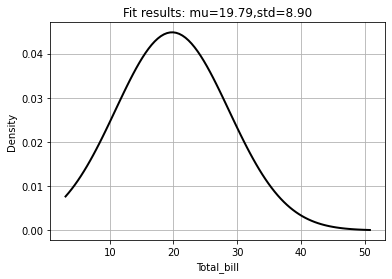

In [10]:
#Fit the normal distribution to the data
x=np.linspace(total_bill_series.min(),total_bill_series.max(),100)
p=stats.norm.pdf(x,mu,std)
plt.plot(x,p,"k",linewidth=2)
title="Fit results: mu=%.2f,std=%.2f" %(mu,std)
plt.title(title)
plt.xlabel("Total_bill")
plt.ylabel("Density")
plt.grid(True)

Text(0.5, 1.0, 'QQ Plot')

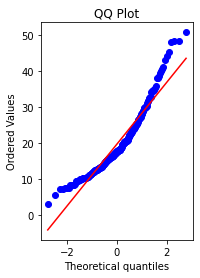

In [11]:
#qqplot
plt.subplot(1,2,2)

stats.probplot(total_bill_series,dist="norm",plot=plt)
plt.title("QQ Plot")




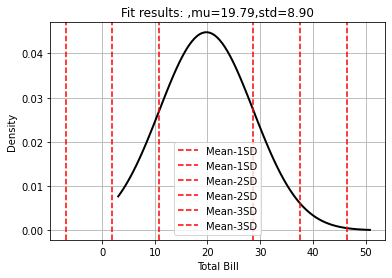

In [16]:
#Fit the noraml distribution to tthe data

z=np.linspace(total_bill_series.mean(),total_bill_series.max(),1000)
p=stats.norm.pdf(x,mu,std)
plt.plot(x,p,"k",linewidth=2)
title="Fit results: ,mu=%.2f,std=%.2f" %(mu,std)
plt.title(title)
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.grid(True)
for i in range(1,4):
    plt.axvline(mu-i*std,color="r",linestyle="--",label=f'Mean-{i}SD')
    plt.axvline(mu+i*std,color="r",linestyle="--",label=f'Mean-{i}SD')
plt.legend()

In [19]:
#check if mean +-SD,mean+-2sd and mean +- 3SD sarisfy the empirical rule
within_1sd = (z_scores <= 1) & (z_scores >= -1)
within_2sd = (z_scores <= 2) & (z_scores >= -2)
within_3sd = (z_scores <= 3) & (z_scores >= -3)

In [22]:
percentage_within_1sd = np.sum(within_1sd) / len(total_bill_series) * 100
percentage_within_2sd = np.sum(within_2sd) / len(total_bill_series) * 100
percentage_within_3sd = np.sum(within_3sd) / len(total_bill_series) * 100

In [24]:
print(f"Percentage of data within mean +- 1 SD: {percentage_within_1sd:.2f}%")
print(f"Percentage of data within mean +- 2 SD: {percentage_within_2sd:.2f}%")
print(f"Percentage of data within mean +- 3 SD: {percentage_within_3sd:.2f}%")

Percentage of data within mean +- 1 SD: 72.13%
Percentage of data within mean +- 2 SD: 94.26%
Percentage of data within mean +- 3 SD: 98.36%


In [25]:
# Create DataFrame to store total_bill, z-score, and witin_1sd, within_2sd, within_3sd flags

result_df = pd.DataFrame({
    'total_bill': total_bill_series,
    'z-score':    z_scores,
    'within_1sd': within_1sd,
    'within_2sd': within_2sd,
    'within_3sd': within_3sd
})

result_df

,total_bill,z-score,within_1sd,within_2sd,within_3sd
0,16.99,-0.314066,True,True,True
1,10.34,-1.061054,False,True,True
2,21.01,0.137497,True,True,True
3,23.68,0.437416,True,True,True
4,24.59,0.539635,True,True,True
...,...,...,...,...,...
239,29.03,1.038377,False,True,True
240,27.18,0.830568,True,True,True
241,22.67,0.323964,True,True,True
242,17.82,-0.220833,True,True,True


In [28]:
import os.path

if os.path.exists("deletethis-2.csv"):
    os.remove("deletethis-2.csv") # Remove the file if it exists


result_df.to_csv("deletethis.csv", index = False)

In [30]:
# Filter the Outliers
# outliers = result_df[(result_df['z-score'] < -3) | (result_df['z_score'] > 3)]
import seaborn as sns

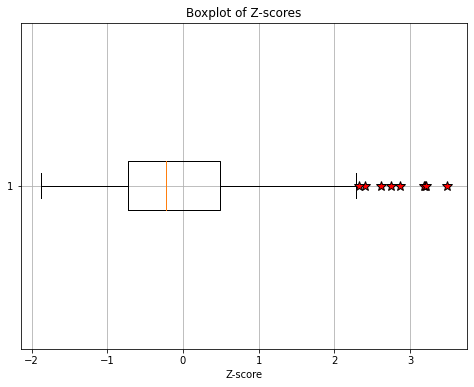

In [34]:
plt.figure(figsize=(8,6))

plt.boxplot(result_df['z-score'], vert=False, flierprops=dict(marker='*', markerfacecolor = 'red', markersize=10))
plt.xlabel('Z-score')
plt.title("Boxplot of Z-scores")
plt.grid(True)
plt.show()